<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-01-10 20:42:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  61.3MB/s    in 3.3s    

2026-01-10 20:42:31 (61.3 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 179.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 174.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 37.5 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [8]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


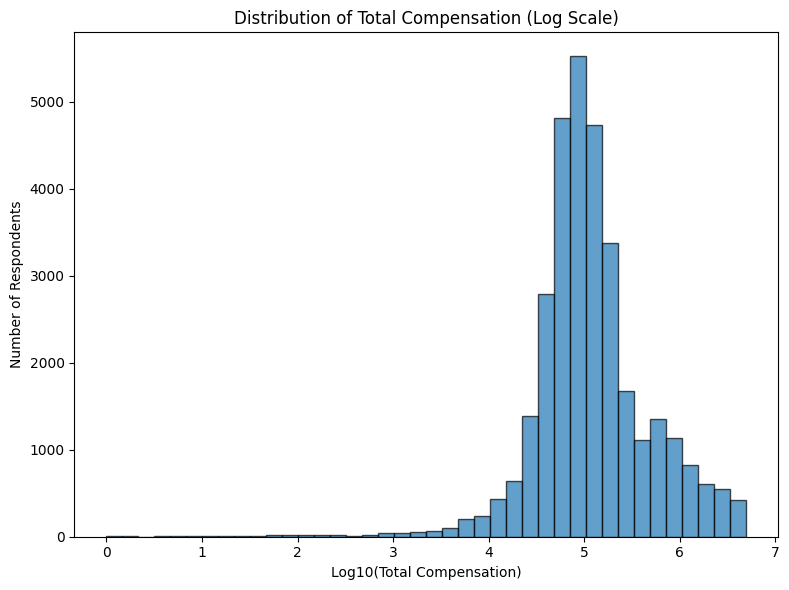

In [12]:
## Write your code here
# Load data
QUERY = "SELECT CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

# Convert to numeric and clean
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df[df["CompTotal"] > 0].dropna(subset=["CompTotal"])

# Optional: cap extreme outliers to avoid distortion
df = df[df["CompTotal"] <= 5_000_000]

# Log-transform compensation
df["LogCompTotal"] = np.log10(df["CompTotal"])

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df["LogCompTotal"], bins=40, edgecolor="black", alpha=0.7)

plt.xlabel("Log10(Total Compensation)")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Total Compensation (Log Scale)")
plt.tight_layout()
plt.show()
##The histogram shows that total compensation is highly skewed in raw form but becomes approximately normally distributed on a log scale, with most 
##respondents earning between roughly $60,000 and $160,000 and a smaller number of high-income outliers..

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


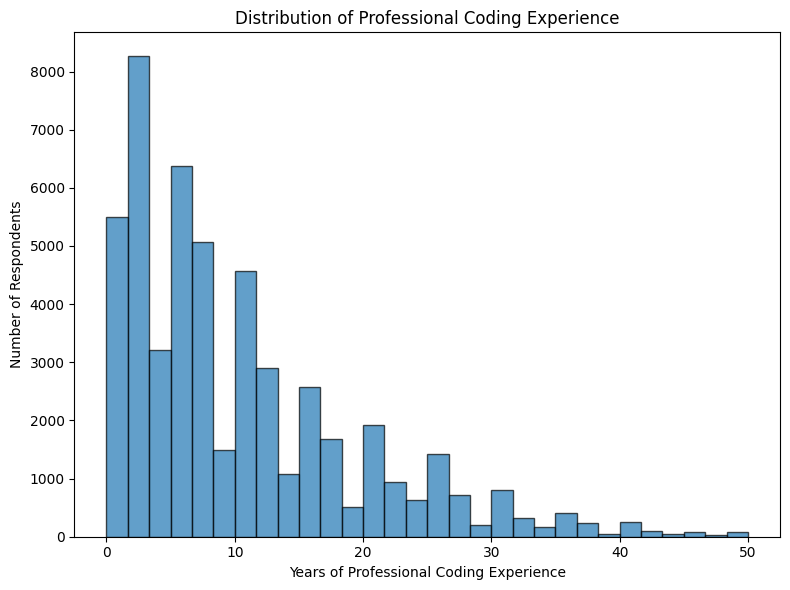

In [13]:
## Write your code here
# Load data
QUERY = "SELECT YearsCodePro FROM main"
df = pd.read_sql_query(QUERY, conn)

# Clean YearsCodePro values
df["YearsCodePro"] = df["YearsCodePro"].replace({
    "Less than 1 year": "0",
    "More than 50 years": "50"
})

# Convert to numeric
df["YearsCodePro_Num"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

# Drop missing values
df_clean = df.dropna(subset=["YearsCodePro_Num"]).copy()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df_clean["YearsCodePro_Num"], bins=30, edgecolor="black", alpha=0.7)

plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Professional Coding Experience")
plt.tight_layout()
plt.show()
##The histogram shows that most respondents have relatively low to moderate years of professional coding experience, 
##with the number of respondents decreasing as experience increases. The distribution is right-skewed, indicating 
##that while many respondents are early- or mid-career developers, fewer have very high levels of professional coding experience.

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


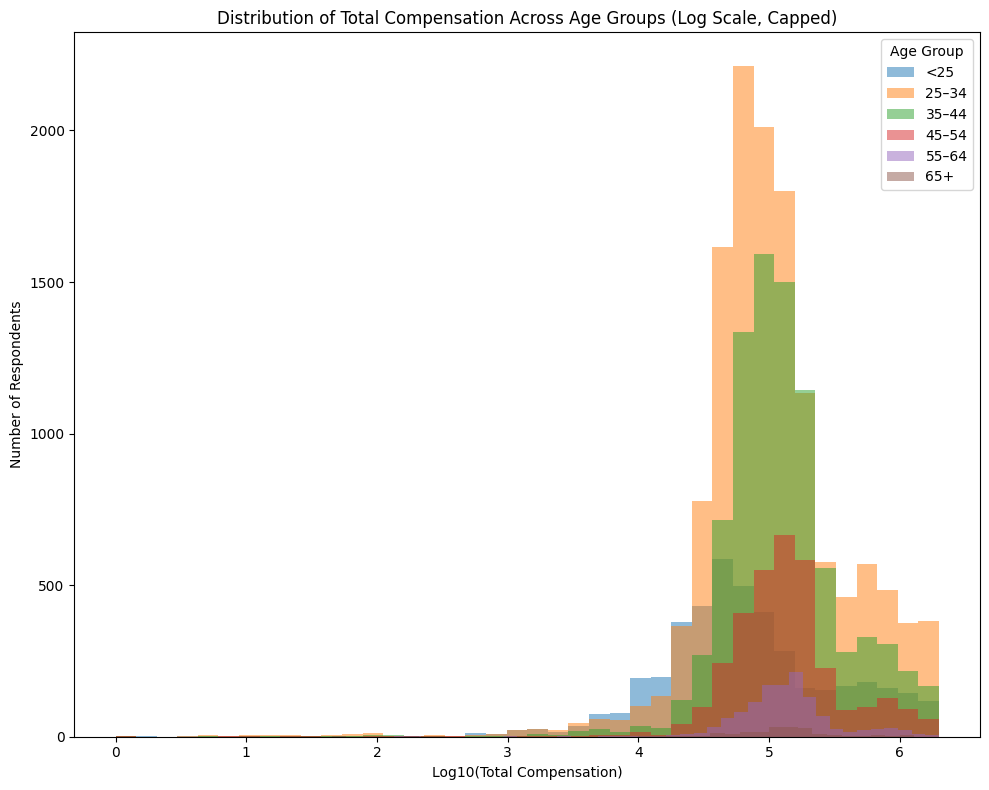

In [7]:
## Write your code here
##Run a simple query to check the data
QUERY = "SELECT Age,CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)
# Clean CompTotal
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["Age", "CompTotal"]).copy()

# Keep positive comp only
df = df[df["CompTotal"] > 0]

##Remove unrealistic outliers (cap)
df = df[df["CompTotal"] <= 2_000_000]   # you can change to 10_000_000 if needed

# Log transform
df["LogCompTotal"] = np.log10(df["CompTotal"])

# Age groups using original labels (most accurate)
age_groups = {
    "<25": ["Under 18 years old", "18-24 years old"],
    "25–34": ["25-34 years old"],
    "35–44": ["35-44 years old"],
    "45–54": ["45-54 years old"],
    "55–64": ["55-64 years old"],
    "65+": ["65 years or older"]
}

plt.figure(figsize=(10, 8))

for label, values in age_groups.items():
    subset = df[df["Age"].isin(values)]["LogCompTotal"]
    plt.hist(subset, bins=40, alpha=0.5, label=label)

plt.xlabel("Log10(Total Compensation)")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Total Compensation Across Age Groups (Log Scale, Capped)")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()
##Interpretation :
##The histogram shows that total compensation generally increases with age, with older age groups exhibiting higher and more variable compensation, 
##while the log transformation reveals a roughly normal distribution across all groups

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


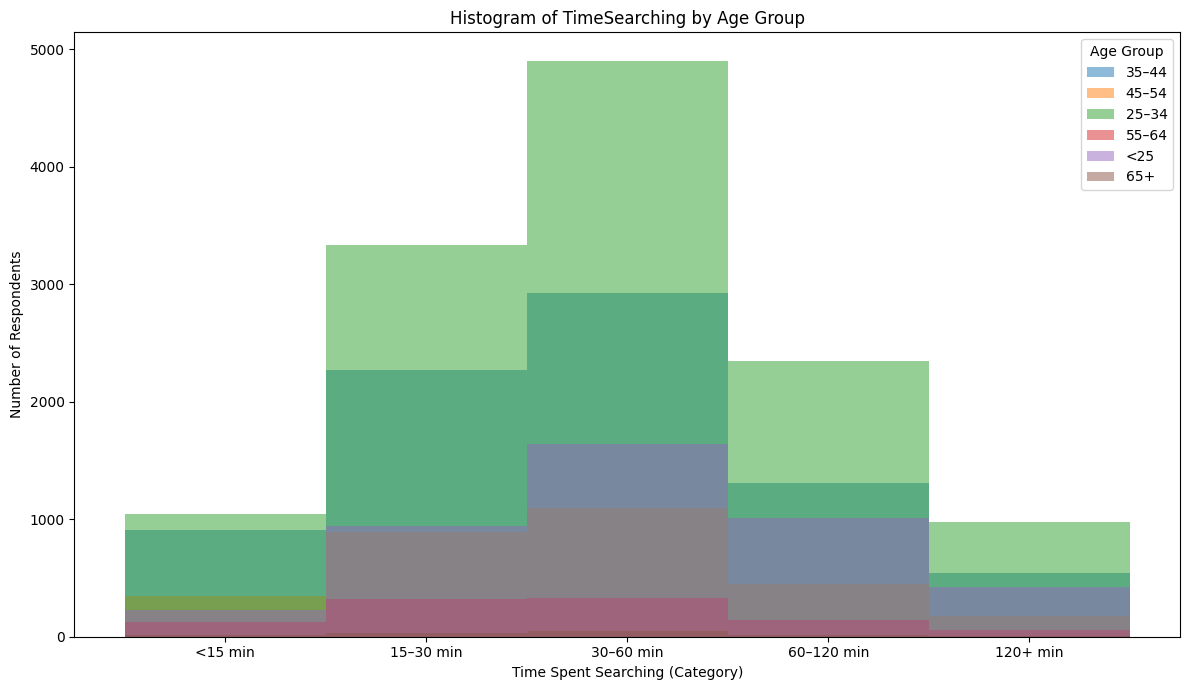

In [53]:
import seaborn as sns
## Write your code here
# Run a simple query to check the data
QUERY = "SELECT Age,TimeSearching FROM main"
df = pd.read_sql_query(QUERY, conn)
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

time_rank_map = {
    "Less than 15 minutes a day": 1,
    "15-30 minutes a day": 2,
    "30-60 minutes a day": 3,
    "60-120 minutes a day": 4,
    "Over 120 minutes a day": 5
}

##Build ONE working dataframe
df_ts = df.dropna(subset=["Age", "TimeSearching"]).copy()

# (optional but robust) trim strings
df_ts["Age"] = df_ts["Age"].astype("string").str.strip()
df_ts["TimeSearching"] = df_ts["TimeSearching"].astype("string").str.strip()

##Map Age and TimeSearching bins INSIDE df_ts
df_ts["Age_Num"] = df_ts["Age"].map(age_map)
df_ts["TimeSearching_Bin"] = df_ts["TimeSearching"].map(time_rank_map)

##Keep only rows that mapped successfully
df_ts = df_ts.dropna(subset=["Age_Num", "TimeSearching_Bin"]).copy()

##Age groups
df_ts["AgeGroup"] = pd.cut(
    df_ts["Age_Num"],
    bins=[0, 25, 35, 45, 55, 65, np.inf],
    labels=["<25", "25–34", "35–44", "45–54", "55–64", "65+"],
    right=False
)

##Plot histogram (discrete bins)
plt.figure(figsize=(12, 7))

for age_group in df_ts["AgeGroup"].dropna().unique():
    subset = df_ts[df_ts["AgeGroup"] == age_group]
    plt.hist(
        subset["TimeSearching_Bin"],
        bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
        alpha=0.5,
        label=str(age_group)
    )

plt.xticks(
    [1, 2, 3, 4, 5],
    ["<15 min", "15–30 min", "30–60 min", "60–120 min", "120+ min"]
)

plt.xlabel("Time Spent Searching (Category)")
plt.ylabel("Number of Respondents")
plt.title("Histogram of TimeSearching by Age Group")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()

##Interpretation:
##The histogram shows that younger respondents tend to spend more time searching for information, while older age groups are concentrated in shorter search-time categories.
##This pattern suggests that experience and familiarity with tools and resources may reduce the time required to locate information

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


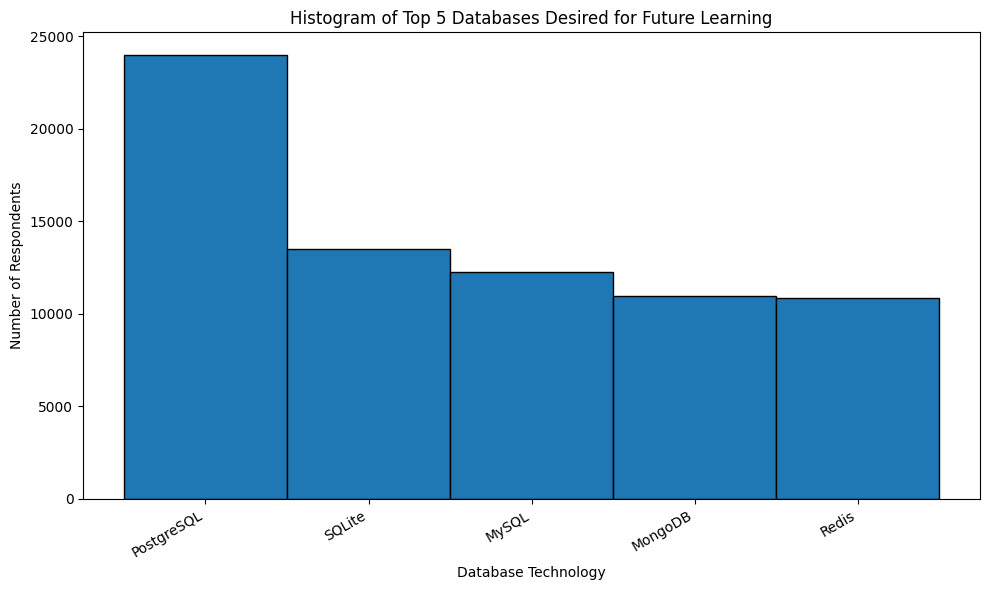

In [15]:
## Write your code here
# Run a simple query to check the data
QUERY = "SELECT DatabaseWantToWorkWith FROM main"
df = pd.read_sql_query(QUERY, conn)
db_series = (
    df["DatabaseWantToWorkWith"]
    .dropna()
    .str.split(";")
    .explode()
)
##print(db_series.head())

top5_dbs = db_series.value_counts().head(5)
db_rank_map = {
    db: i + 1 for i, db in enumerate(top5_dbs.index)
}

db_top = db_series[db_series.isin(top5_dbs.index)]
##print(db_top)
##print(db_rank_map)
db_bins = db_top.map(db_rank_map)
plt.figure(figsize=(10, 6))

plt.hist(
    db_bins,
    bins=np.arange(0.5, 6.5, 1),
    edgecolor="black"
)

plt.xticks(
    range(1, 6),
    top5_dbs.index,
    rotation=30,
    ha="right"
)

plt.xlabel("Database Technology")
plt.ylabel("Number of Respondents")
plt.title("Histogram of Top 5 Databases Desired for Future Learning")
plt.tight_layout()
plt.show()

##Interpretation 
##The histogram shows the distribution of the top five databases that respondents are most interested in learning in the future. 
##The results indicate clear preferences for certain database technologies, suggesting areas of growing demand and relevance in the industry.
##The histogram indicates that PostgreSQL is the most desired database for future learning, followed by SQLite and MySQL, while MongoDB and Redis also show strong interest among respondents.

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


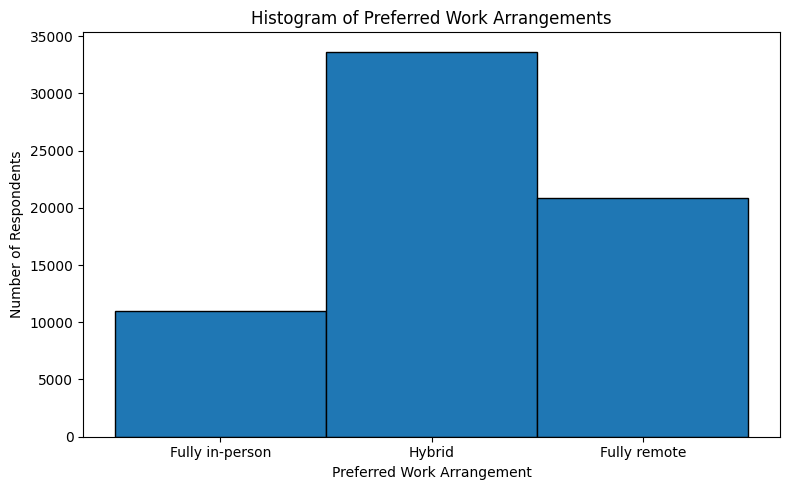

In [75]:
## Write your code here
# Run a simple query to check the data
QUERY = "SELECT RemoteWork FROM main"
df = pd.read_sql_query(QUERY, conn)
remote_mode = df["RemoteWork"].mode()[0]
df["RemoteWork_Imputed"] = df["RemoteWork"].fillna(remote_mode)
remote_map = {
    "In-person": 1,
    "Hybrid (some remote, some in-person)": 2,
    "Remote": 3
}
df_rw = df.dropna(subset=["RemoteWork_Imputed"]).copy()
df_rw["RemoteWork_Bin"] = df_rw["RemoteWork_Imputed"].map(remote_map)
plt.figure(figsize=(8, 5))

plt.hist(
    df_rw["RemoteWork_Bin"],
    bins=[0.5, 1.5, 2.5, 3.5],
    edgecolor="black"
)

plt.xticks(
    [1, 2, 3],
    ["Fully in-person", "Hybrid", "Fully remote"]
)

plt.xlabel("Preferred Work Arrangement")
plt.ylabel("Number of Respondents")
plt.title("Histogram of Preferred Work Arrangements")
plt.tight_layout()
plt.show()
##Interpretation
##The histogram indicates that most respondents prefer 
##flexible work arrangements, with hybrid work being the most popular choice, followed by fully remote work, while fully in-person work is least preferred

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


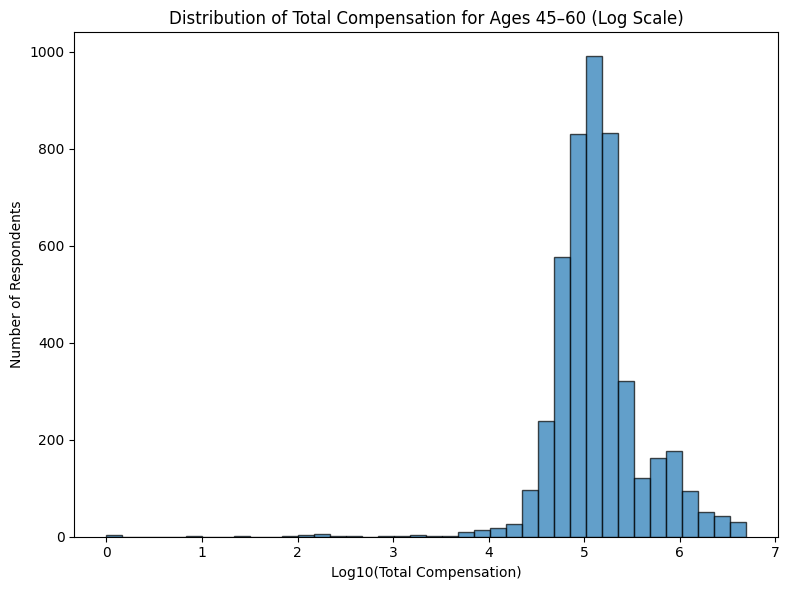

In [8]:
## Write your code here
# Load data
QUERY = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

# Clean compensation
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df[df["CompTotal"] > 0].dropna(subset=["Age", "CompTotal"]).copy()

# Filter mid-career age group (45–60)
mid_career_ages = ["45-54 years old", "55-64 years old"] 
df_mid = df[df["Age"].isin(mid_career_ages)].copy()

# Optional but recommended: cap extreme outliers
df_mid = df_mid[df_mid["CompTotal"] <= 5_000_000]

# Log-transform compensation
df_mid["LogCompTotal"] = np.log10(df_mid["CompTotal"])

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df_mid["LogCompTotal"], bins=40, edgecolor="black", alpha=0.7)

plt.xlabel("Log10(Total Compensation)")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Total Compensation for Ages 45–60 (Log Scale)")
plt.tight_layout()
plt.show()
##Interpretation
##The histogram shows that mid-career respondents aged 45–60 predominantly earn between approximately $100,000 and $200,000, with a
##smaller number of high earners creating a right-skewed tail, consistent with a log-normal compensation distribution.

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


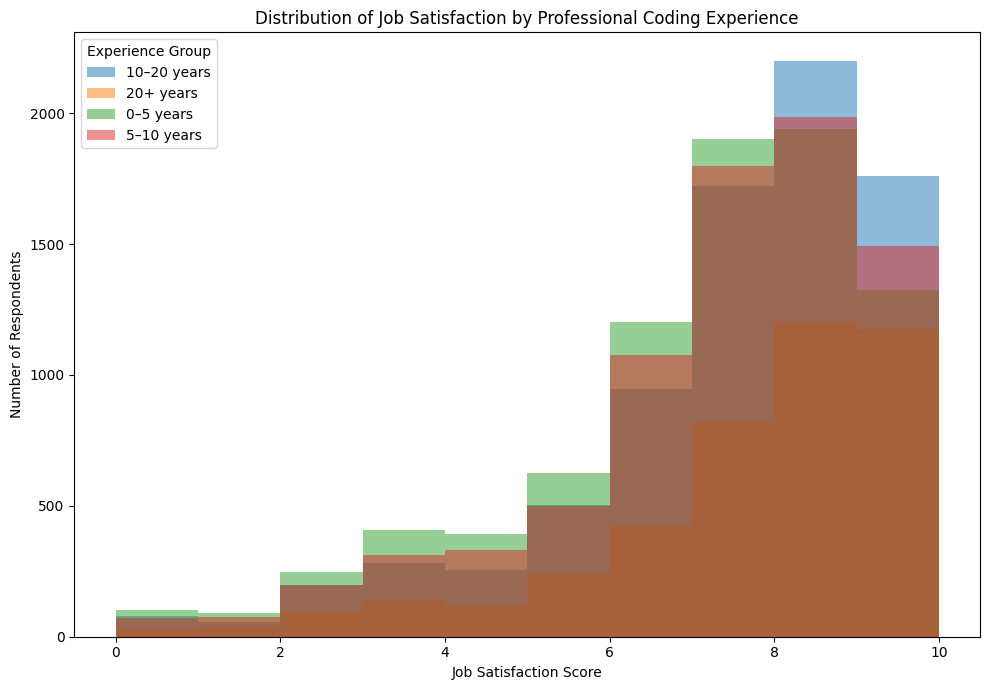

In [14]:
## Write your code here
# Load required columns
QUERY = "SELECT YearsCodePro, JobSat FROM main"
df = pd.read_sql_query(QUERY, conn)
##print (df["JobSat"].dropna())
# Convert JobSat to numeric
df["JobSat"] = pd.to_numeric(df["JobSat"], errors="coerce") 
# Clean YearsCodePro
df["YearsCodePro"] = df["YearsCodePro"].replace({
    "Less than 1 year": "0",
    "More than 50 years": "50"
})

df["YearsCodePro_Num"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

# Drop rows with missing values
df_clean = df.dropna(subset=["YearsCodePro_Num", "JobSat"]).copy()

# Create experience ranges
df_clean["ExperienceGroup"] = pd.cut(
    df_clean["YearsCodePro_Num"],
    bins=[0, 5, 10, 20, 50],
    labels=["0–5 years", "5–10 years", "10–20 years", "20+ years"],
    right=False
)

# Plot histogram
plt.figure(figsize=(10, 7))

for group in df_clean["ExperienceGroup"].dropna().unique():
    subset = df_clean[df_clean["ExperienceGroup"] == group]
    plt.hist(
        subset["JobSat"],
        bins=10,
        alpha=0.5,
        label=group
    )

plt.xlabel("Job Satisfaction Score")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Job Satisfaction by Professional Coding Experience")
plt.legend(title="Experience Group")
plt.tight_layout()
plt.show()
##The histogram indicates that job satisfaction tends to increase with professional coding experience, with more experienced respondents
##reporting higher and more consistent satisfaction levels

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
